## Aufgabe 1 $\frac{e}{m}$-Bestimmung mit dem Fadenstrahlrohr
### 1.1 Untersuchung des Feldes eines Helmholtzspulenpaars 
Bauen Sie vor dem Plexiglaskasten mit Helmholtzspulen und Fadenstrahlrohr die zusätzliche Helmholtzspule mit Meßplatte so auf, dass sich die Meßplatte in der Mittelebene zwischen zwei Spulen befindet. Die Anordnung gleicht der Spulenanordnung, in der sich das Fadenstrahlrohr befindet. Die Spulen beiderseits der Meßplatte sind in Reihe zu schalten. Die Anschlüsse der betreffenden Spule im Plexiglaskasten sind an extra Buchsen herausgeführt. Die Meßplatte
kann an etlichen vorgesehenen Stellen die Hallsonde aufnehmen.\
Bild dieses Aufbaus:\
![](Helmholtz-Spulenpaar.jpg)  \
Messen Sie die Hallspannungen an den vorgesehenen Stellen für die Spulenströme $1.0$; $1.5$; und $2.0 A$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate

Welcome to JupyROOT 6.24/06


In [2]:
data=np.loadtxt('1.1hallspannungen_ströme.txt', skiprows=4) #importiere Daten
U_1A=data[:,0]*10**(-3)
U_15A=data[:,1]*10**(-3)
U_2A=data[:,2]*10**(-3)
print('gemessene Hallspannungen bei einem Spulenstrom von 0.978A:', U_1A, 'in V')
print('gemessene Hallspannungen bei einem Spulenstrom von 1.504A:', U_15A, 'in V')
print('gemessene Hallspannungen bei einem Spulenstrom von 2.014A:', U_2A, 'in V')

gemessene Hallspannungen bei einem Spulenstrom von 0.978A: [0.02344 0.0255  0.02587 0.02587 0.02606 0.02606 0.02512 0.02119 0.02587
 0.02662 0.02681 0.02681] in V
gemessene Hallspannungen bei einem Spulenstrom von 1.504A: [0.03731 0.04013 0.04106 0.04125 0.04125 0.04106 0.03919 0.03338 0.0405
 0.04163 0.042   0.04144] in V
gemessene Hallspannungen bei einem Spulenstrom von 2.014A: [0.0495  0.05325 0.05456 0.05494 0.05494 0.05496 0.05194 0.04406 0.05381
 0.05494 0.05438 0.05381] in V


### 1.2 Kalibrieren Sie die Hallsonde mit Hilfe des berechenbaren Feldes der langen Eichspule
Messen Sie etwa 10 Wertepaare (Hallspannung/Spulenstrom) und berechnen Sie daraus die Eichgerade B(UHall). Der Bereich der hier gemessenen Hallspannungen sollte zu den bei Aufgabe 1.1 gemessenen Werten passen.

In [3]:
data=np.loadtxt('1.2hallspannungen_ströme.txt', skiprows=7) #importiere gemessene Daten
U_hall=data[:,1]*10**(-3)
I_sp=data[:,0]
print('angelegter Spulenstrom:',I_sp, 'in A')
print('gemessene Hallspannung:',U_hall, 'in V')


angelegter Spulenstrom: [0.103 0.164 0.211 0.291 0.355 0.498 0.598 0.745 0.881 0.928] in A
gemessene Hallspannung: [0.01106 0.01706 0.02175 0.03    0.03656 0.05006 0.06075 0.075   0.08944
 0.09356] in V


$B_{UHall}$ berechnen mit folgender Formel: $B_{UHall}=\frac{\mu_{0} \cdot I\cdot N}{L}$ \
Wobei N die Anzahl der Windungen, L die Länge der Spule und $\mu_{0}$ die magnetische Feldkonstante mit einem Wert von $\mu_{0}=1.256637 \cdot 10^{-6} \frac{N}{A^2}$ ist.

In [4]:
y0=1.256637*10**(-6)
L= 0.3
N=750
B_hall=(y0*I_sp*N)/L
print(U_hall,B_hall)
#indexes = [0, 6, 7] # Entfernen 0,6,7 für experimentelle bestimmung
#B_hall = np.delete(B_hall, indexes)
#U_hall = np.delete(U_hall, indexes)
#print(B_hall)
#print(U_hall)

[0.01106 0.01706 0.02175 0.03    0.03656 0.05006 0.06075 0.075   0.08944
 0.09356] [0.00032358 0.00051522 0.00066288 0.0009142  0.00111527 0.00156451
 0.00187867 0.00234049 0.00276774 0.0029154 ]


########
# Data #
########

    X Data 
    0.01106
    0.01706
    0.02175
    0.03   
    0.03656
    0.05006
    0.06075
    0.075  
    0.08944
    0.09356

    Y Data   
    0.0003236
    0.0005152
    0.0006629
    0.0009142
    0.001115 
    0.001565 
    0.001879 
    0.00234  
    0.002768 
    0.002915 

#########
# Model #
#########

    Model Function

        linear_model(U_H; a, B_0) = a * U_H + B_0

    X Model
    0.01106
    0.01706
    0.02175
    0.03   
    0.03656
    0.05006
    0.06075
    0.075  
    0.08944
    0.09356

    Y Model  
    0.0003255
    0.0005135
    0.0006606
    0.0009192
    0.001125 
    0.001548 
    0.001883 
    0.00233  
    0.002782 
    0.002911 

###############
# Fit Results #
###############

    Model Parameters

        a = 0.031
        B_0 = -2.1e-05

    Cost Function

        Cost function: chi-square (no uncertainties)

        Cost = 7.648e-10



/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


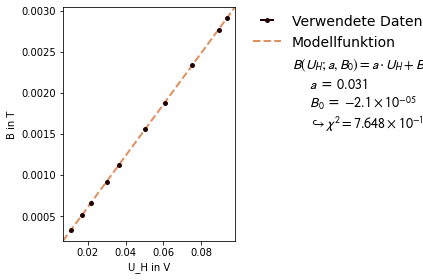

In [5]:
xy_data = XYContainer(U_hall,B_hall)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
line_fit.assign_model_function_expression('B')
line_fit.assign_model_function_expression("{a} * {x} + {b}")
line_fit.report()

line_fit.assign_parameter_latex_names(x='U_H', a='a', b='B_0')
line_fit.assign_model_function_latex_name('B')
line_fit.assign_model_function_latex_expression('{a} \\cdot {x} + {b}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["U_H in V", "B in T"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save()

In [6]:
B0=-2.1*10**(-5)
B1=0.031
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)
def B_hall(U, B0=-1.9*10**(-5), B1=0.031):
    return B0 + B1*U
print('Damit ergibt sich für die Eichgerade: B_hall(U)=',round_sig(B0,4),'+',round_sig(B1,4),'* U')

Damit ergibt sich für die Eichgerade: B_hall(U)= -2.1e-05 + 0.031 * U


### 1.3 Vergleichen Sie den gemessenen Wert des Mittenfeldes zwischen den Helmholtzspulen mit dem berechneten Wert. Überprüfen Sie die Feldhomogenität bei der vorliegenden Spulenanordnung. 
Unter der Voraussetzung Spulenradius = Spulenabstand = R gilt für das Mittenfeld $$B=0.7155\cdot \mu_{0} \cdot n \cdot \frac{I}{R}$$
Dabei ist n die Windungszahl der Spule und I der Strom in der Spule.

In [7]:
B_mess=B_hall
y0=1.256637*10**(-6)
n=130
R=0.15
def B_rech(I, y0, n, R):
    return 0.7155*y0*n*I/R


In [8]:
indexes = [0, 6, 7] # Entfernen 0,6,7 für experimentelle bestimmung
B_1A_mess=B_mess(U_1A)
B_1A_mess = np.delete(B_1A_mess, indexes)
B_1A_mess_mean=np.mean(B_1A_mess)
B_1A_mess_abw=np.sqrt(np.var(B_1A_mess))
B_1A_mess_u=ufloat(B_1A_mess_mean,B_1A_mess_abw)
B_rech(1, y0, n, R)
print('Für die gemessene Stromstärke von 1A ergibt sich ein durschnittliches B-Feld mit folgender Stärke:',B_1A_mess_u,' T aus den Berechnungen ergibt sich:',B_rech(1, y0, n, R),'T') 

B_15A_mess=B_mess(U_15A)
B_15A_mess = np.delete(B_15A_mess, indexes)
B_15A_mess_mean=np.mean(B_15A_mess)
B_15A_mess_abw=np.sqrt(np.var(B_15A_mess))
B_15A_mess_u=ufloat(B_15A_mess_mean,B_15A_mess_abw)
B_rech(1.5, y0, n, R)
print('Für die gemessene Stromstärke von 15A ergibt sich ein durschnittliches B-Feld mit folgender Stärke:',B_15A_mess_u,' T aus den Berechnungen ergibt sich:',B_rech(1.5, y0, n, R),'T')

B_2A_mess=B_mess(U_2A)
B_2A_mess = np.delete(B_2A_mess, indexes)
B_2A_mess_mean=np.mean(B_2A_mess)
B_2A_mess_abw=np.sqrt(np.var(B_2A_mess))
B_2A_mess_u=ufloat(B_2A_mess_mean,B_2A_mess_abw)
B_rech(2, y0, n, R)
print('Für die gemessene Stromstärke von 2A ergibt sich ein durschnittliches B-Feld mit folgender Stärke:',B_2A_mess_u,' T aus den Berechnungen ergibt sich:',B_rech(2, y0, n, R),'T')

Für die gemessene Stromstärke von 1A ergibt sich ein durschnittliches B-Feld mit folgender Stärke: 0.000792+/-0.000014  T aus den Berechnungen ergibt sich: 0.0007792406037 T
Für die gemessene Stromstärke von 15A ergibt sich ein durschnittliches B-Feld mit folgender Stärke: 0.001257+/-0.000016  T aus den Berechnungen ergibt sich: 0.00116886090555 T
Für die gemessene Stromstärke von 2A ergibt sich ein durschnittliches B-Feld mit folgender Stärke: 0.001667+/-0.000019  T aus den Berechnungen ergibt sich: 0.0015584812074 T


### 1.4

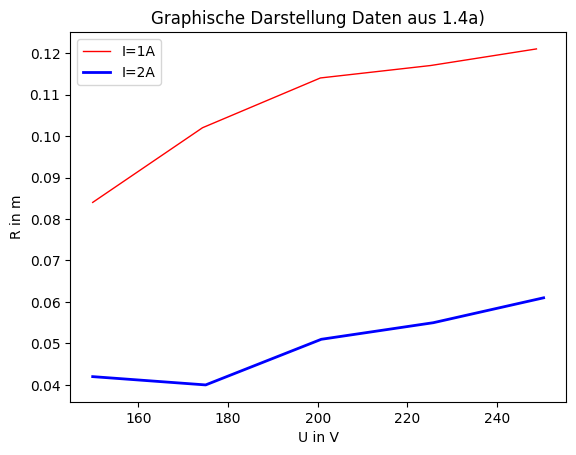

In [9]:
data=np.loadtxt('1.4a).txt', skiprows=3) #importiere gemessene Daten
U_1A=data[:,0]
R_1A=data[:,1]*10**(-2)
U_2A=data[:,2]
R_2A=data[:,3]*10**(-2)

plt.plot(U_1A, R_1A, c='red', lw=1, label='I=1A')
plt.plot(U_2A, R_2A, c='blue', lw=2, label='I=2A' )
plt.xlabel('U in V')
plt.ylabel('R in m')
plt.legend()
plt.title('Graphische Darstellung Daten aus 1.4a)')
plt.show()

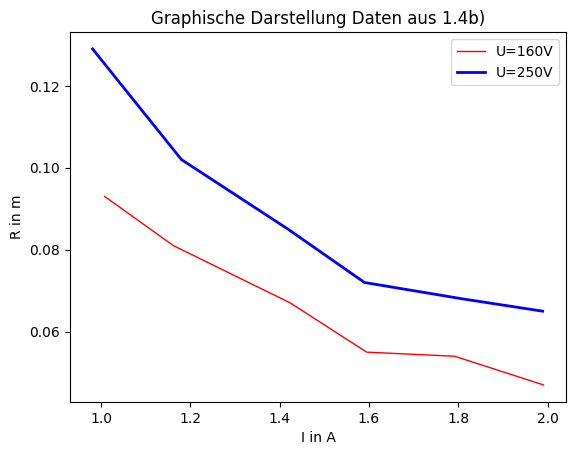

In [10]:
data=np.loadtxt('1.4b).txt', skiprows=3) #importiere gemessene Daten
I_160V=data[:,0]
R_160V=data[:,1]*10**(-2)
I_250V=data[:,2]
R_250V=data[:,3]*10**(-2)

plt.plot(I_160V, R_160V, c='red', lw=1, label='U=160V')
plt.plot(I_250V, R_250V, c='blue', lw=2, label='U=250V' )
plt.xlabel('I in A')
plt.ylabel('R in m')
plt.legend()
plt.title('Graphische Darstellung Daten aus 1.4b)')
plt.show()


/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


########
# Data #
########

    X Data   
    4.431e-09
    4.143e-09
    3.934e-09
    3.149e-09
    2.136e-09
    1.126e-09
    9.156e-10
    7.873e-10
    4.843e-10
    5.339e-10
    2.618e-09
    1.986e-09
    1.359e-09
    9.156e-10
    8.826e-10
    6.686e-10
    5.037e-09
    3.149e-09
    2.187e-09
    1.569e-09
    1.4e-09  
    1.279e-09

    Y Data
    248.8 
    225.2 
    200.6 
    174.3 
    149.8 
    62.6  
    56.45 
    50.2  
    43.75 
    37.45 
    157.5 
    118.5 
    78.9  
    62.89 
    49.82 
    40.36 
    259.8 
    179.5 
    124.2 
    98.89 
    76.31 
    63.19 

#########
# Model #
#########

    Model Function

        linear_model(r; a, U/I^2) = a * r 

    X Model  
    4.431e-09
    4.143e-09
    3.934e-09
    3.149e-09
    2.136e-09
    1.126e-09
    9.156e-10
    7.873e-10
    4.843e-10
    5.339e-10
    2.618e-09
    1.986e-09
    1.359e-09
    9.156e-10
    8.826e-10
    6.686e-10
    5.037e-09
    3.149e-09
    2.187e-09
    1.569e-09
    1.

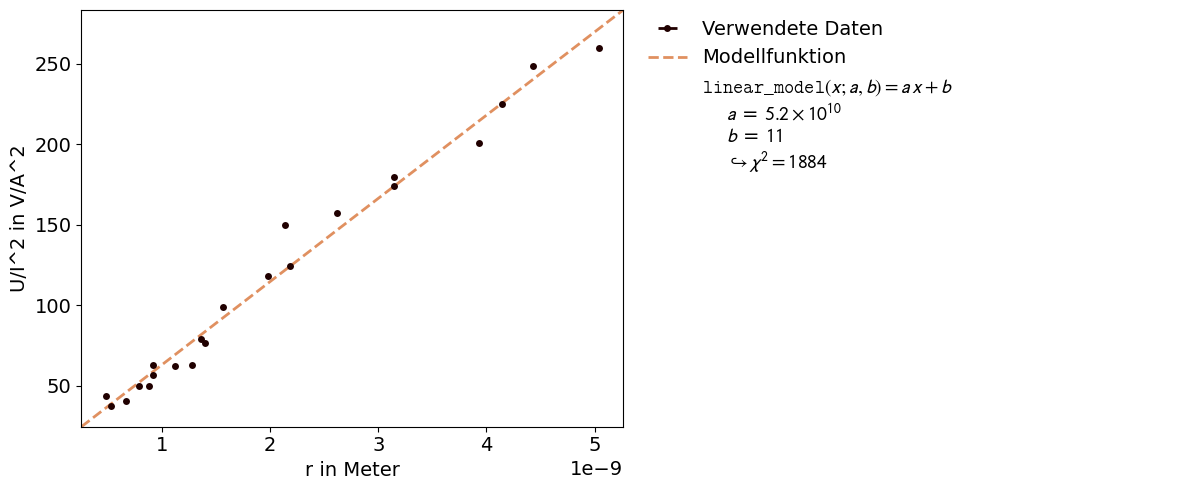

In [18]:
dataUI2 = U_1A/1**2
dataR = R_1A

dataUI2 =np.append(dataUI2,U_2A/2**2,axis=0)
dataUI2 =np.append(dataUI2,160/I_160V**2,axis=0)
dataUI2 =np.append(dataUI2,250/I_250V**2,axis=0)

dataR =np.append(dataR,R_2A,axis=0)
dataR =np.append(dataR,R_160V,axis=0)
dataR =np.append(dataR,R_250V,axis=0)
c = 0.7144 * y0 * 130/0.15
dataR = dataR**2 * c**2*1/2

xy_data = XYContainer(dataR,dataUI2)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='r', a='a', b='U/I^2')
line_fit.assign_model_function_expression('B')
line_fit.assign_model_function_expression("{a} * {x} ")
line_fit.report()

#line_fit.assign_parameter_latex_names(x='r', a='a', b='\frac{U}{I^2}')
#line_fit.assign_model_function_latex_name('\frac{U}{I^2}')
#line_fit.assign_model_function_latex_expression('{a} \\cdot {x}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["r in Meter", "U/I^2 in V/A^2"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save()

## Aufgabe 2.2

In [12]:
data=np.loadtxt('2.2.txt', skiprows=3) #importiere gemessene Daten
U=data[:,0]
I=data[:,1]*10**(-2)
a0=0.08
a1=0.15
L=0.2
R=0.045
y0=1.256637*10**(-6)
n=130
B0=y0*I*n/L
K=1/(a1-a0)*0.567*((np.sqrt(a1**2+R**2)-(a1**2-2*a1*L+L**2+R**2)/np.sqrt((a1-L)**2+R**2)))-((np.sqrt(a1**2+R**2)-(a0**2-2*a0*L+L**2+R**2)/np.sqrt((a0-L)**2+R**2)))
B=B0*K

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


########
# Data #
########

    X Data
    200.0 
    250.0 
    299.0 
    350.0 
    403.0 
    449.0 
    501.0 
    551.0 
    596.0 
    649.0 
    701.0 

    Y Data   
    3.916e-18
    6.197e-18
    8.695e-18
    1.238e-17
    1.669e-17
    2.03e-17 
    2.678e-17
    3.188e-17
    3.846e-17
    4.511e-17
    5.309e-17

#########
# Model #
#########

    Model Function

        linear_model(r; a, U/I^2) = a * r 

    X Model
    200.0  
    250.0  
    299.0  
    350.0  
    403.0  
    449.0  
    501.0  
    551.0  
    596.0  
    649.0  
    701.0  

    Y Model   
    -1.11e-10 
    -1.196e-10
    -1.279e-10
    -1.366e-10
    -1.456e-10
    -1.534e-10
    -1.623e-10
    -1.708e-10
    -1.785e-10
    -1.875e-10
    -1.963e-10

###############
# Fit Results #
###############

    Model Parameters

        a = -1.7e-13
        U/I^2 = -7.7e-11

    Cost Function

        Cost function: chi-square (no uncertainties)

        Cost = 2.674e-19



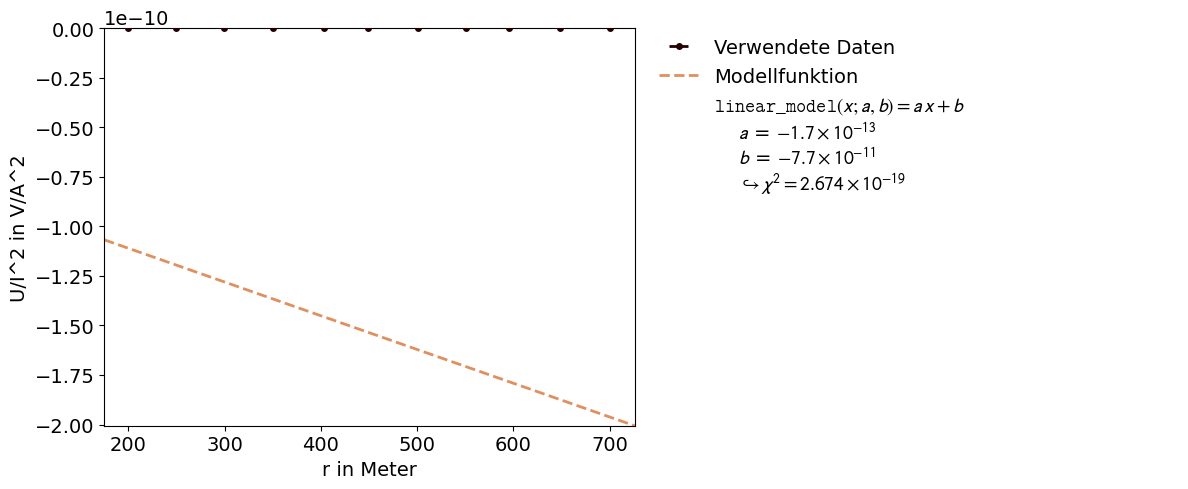

In [14]:
dataU = U
dataI = I
dataI = dataI**2 * B**2 *1/2

xy_data = XYContainer(dataU,dataI)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='r', a='a', b='U/I^2')
line_fit.assign_model_function_expression('B')
line_fit.assign_model_function_expression("{a} * {x} ")
line_fit.report()

#line_fit.assign_parameter_latex_names(x='r', a='a', b='\frac{U}{I^2}')
#line_fit.assign_model_function_latex_name('\frac{U}{I^2}')
#line_fit.assign_model_function_latex_expression('{a} \\cdot {x}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["r in Meter", "U/I^2 in V/A^2"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save()